In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tqdm import tqdm
from glob import glob

import cv2
import warnings
import torch
import json

In [3]:
df = pd.read_csv('/content/drive/MyDrive/페트병_1039.csv')      # 공유폴더의 페트병_1039 파일을 내 드라이브에 옮겨 읽어야함
                                                                # 페트병(오류)도 마찬가지로 자기 드라이브로 옮긴후 진행
df

,name,class,detail,damage,trans,fill,tag,dirty,color
0,PET_PET.0.jpg,페트병류,페트병,원형,불투명,0,1,0,0
1,PET_PET.1.jpg,페트병류,페트병,원형,불투명,0,1,0,0
2,PET_PET.2.jpg,페트병류,페트병,원형,불투명,0,1,0,0
3,PET_PET.3.jpg,페트병류,페트병,원형,불투명,0,1,0,0
4,PET_PET.4.jpg,페트병류,페트병,원형,불투명,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14929,PET_PET.14929.jpg,페트병류,페트병,원형,불투명,0,0,0,0
14930,PET_PET.14930.jpg,페트병류,페트병,상당훼손,불투명,0,0,0,0
14931,PET_PET.14931.jpg,페트병류,페트병,상당훼손,불투명,0,0,0,0
14932,PET_PET.14932.jpg,페트병류,페트병,상당훼손,투명,0,0,0,0


In [57]:
file_l = []
ind_list=[]
df1 = df[df['color']==1]    ## 원하는 조건의 데이터프레임
df2 = df1.reset_index()       ## df1 과정에서 인덱스가 꼬였기 때문에 reset 시키고 기존 인덱스를 하나의 컬럼으로 만듦
for i in range(len(df2['index'])):
  ind_list.append(df2['index'][i])
for k in ind_list:
  name = '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.'+str(k)+'.jpg' ### 페트병 (오류) 가 있는 경로 인덱스값은 int값이므로 str으로 바꾸어야함
  a = glob(name)
  file_l.extend(a)
file_l

['/content/drive/MyDrive/페트_페트병(오류)/PET_PET.45.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.46.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.47.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.48.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.49.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.65.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.66.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.67.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.68.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.69.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.70.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.71.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.72.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.73.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.74.jpg',
 '/content/drive/MyDrive/페트_페트병(오류)/PET_PET.95.jpg',
 '/content/drive/MyDrive

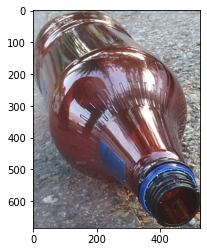

In [55]:

x = plt.imread(file_l[2])
plt.imshow(x) ###### 잘 되는듯 ~